In [1]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import numpy as np
import pylab as plt
import pandas as pd
species = ['I','X', 'Y']
reactions = [(['X'], [], 'massaction', {'k':'d1'}), 
             ([], ['X'], 'hillpositive', {'s1':'I', 'k':'k1', 'K':'KR', 'n':2}),
             (['X'],['Y'],'massaction', {'k':'k2'})]
k1 = 50.0
d1 = 0.5
k2 = 10
params = [('k1', k1), ('d1', d1), ('KR', 20), ('k2',k2)]
initial_condition = {'X':0, 'I':0}
M = Model(species = species, reactions = reactions, parameters = params, 
          initial_condition_dict = initial_condition)

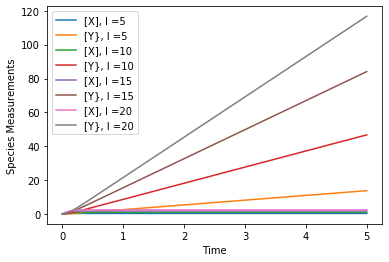

In [2]:
num_trajectories = 4 # each with different initial condition
initial_condition_list = [{'I':5},{'I':10},{'I':15},{'I':20}] 
timepoints = np.linspace(0,5,100)
result_list = []
for init_cond in initial_condition_list:
    M.set_species(init_cond)
    result = py_simulate_model(timepoints, Model = M)
    result_list.append(result)
    plt.plot(timepoints, result['X'], label = '[X], I =' + str(list(init_cond.values())[0]))
    plt.plot(timepoints, result['Y'], label = '[Y}, I =' + str(list(init_cond.values())[0]))
plt.xlabel('Time')
plt.ylabel('Species Measurements')
plt.legend()
plt.show()

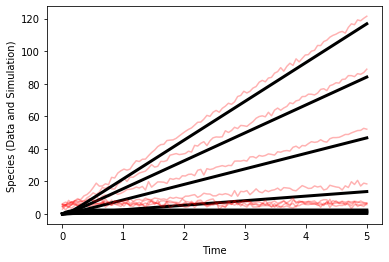

In [3]:

exp_data = pd.DataFrame()
exp_data['timepoints'] = timepoints
for i in range(num_trajectories):
    exp_data['X' + str(i)] = result_list[i]['X'] + np.random.normal(5, 1, size = np.shape(result['X']))
    exp_data['Y' + str(i)] = result_list[i]['Y'] + np.random.normal(5, 1, size = np.shape(result['Y']))
    plt.plot(timepoints, exp_data['X' + str(i)], 'r', alpha = 0.3)
    plt.plot(timepoints, exp_data['Y' + str(i)], 'r', alpha = 0.3)
    plt.plot(timepoints, result_list[i]['X'], 'k', linewidth = 3)
    plt.plot(timepoints, result_list[i]['Y'], 'k', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Species (Data and Simulation)')
plt.show()


In [4]:
exp_data.to_csv('multiple_measurements.csv')
exp_data

,timepoints,X0,Y0,X1,Y1,X2,Y2,X3,Y3
0,0.000000,5.664492,4.782039,2.950689,4.261058,6.227156,4.606702,5.914299,5.690812
1,0.050505,5.767911,2.468151,4.996242,5.561859,7.217860,5.671118,4.635602,5.651134
2,0.101010,3.927069,4.570176,4.237410,5.304269,6.588206,6.031960,8.330174,6.517552
3,0.151515,6.173175,3.449953,5.588694,7.476543,7.301822,5.428644,6.304681,7.330424
4,0.202020,5.780639,5.192606,6.734365,6.939675,5.813416,8.132354,8.107286,7.902726
5,0.252525,5.030755,5.516360,4.997328,7.077658,6.406990,9.427484,7.427785,8.659669
6,0.303030,5.995321,4.805725,5.867671,7.998126,6.153607,8.090481,7.319138,8.889777
7,0.353535,5.157869,6.123120,5.825731,6.481795,4.596458,7.740085,8.251666,11.065227
8,0.404040,6.206556,4.381761,6.517808,8.732501,5.418819,9.904794,7.123928,11.946831
9,0.454545,4.065390,4.938133,5.903905,9.416236,6.528085,11.002618,9.207129,13.609956


In [5]:
exp_data = []
for i in range(num_trajectories):
    df = pd.read_csv('multiple_measurements.csv', usecols = ['timepoints', 'X'+str(i),'Y'+str(i)])
    df.columns = ['timepoints', 'X', 'Y']
    exp_data.append(df)

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [14:22<00:00,  4.49it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file. Check the MCMC diagnostics to evaluate convergence.
{'Autocorrelation time for each parameter': array([71.42739032, 60.99010655, 58.07942025, 57.64825854]), 'Acceptance fraction (fraction of steps that were accepted)': array([0.561  , 0.54075, 0.53575, 0.5305 , 0.536  , 0.53375, 0.54975,
       0.53875, 0.529  , 0.50875, 0.12125, 0.51025, 0.539  , 0.529  ,
       0.563  , 0.53625, 0.5385 , 0.5265 , 0.52125, 0.54175, 0.541  ,
       0.544  , 0.5375 , 0.53275, 0.5275 , 0.532  , 0.531  , 0.5335 ,
       0.53   , 0.52975, 0.533  , 0.49775, 0.54875, 0.54525, 0.50675,
       0.53125, 0.53825, 0.5315 , 0.523  , 0.509  , 0.51925, 0.53175,
       0.51   , 0.51025, 0.51575, 0.54375, 0.53325, 0.527  , 0.53625,
       0.52975, 0.5305 , 0.56525, 0.5155 , 0.5575 , 0.55275, 0.52925,
       0.5545 , 0.54775, 0.539  , 0.31475, 0.53525, 0.53475, 0.544  ,
       0.51875, 0.53125, 

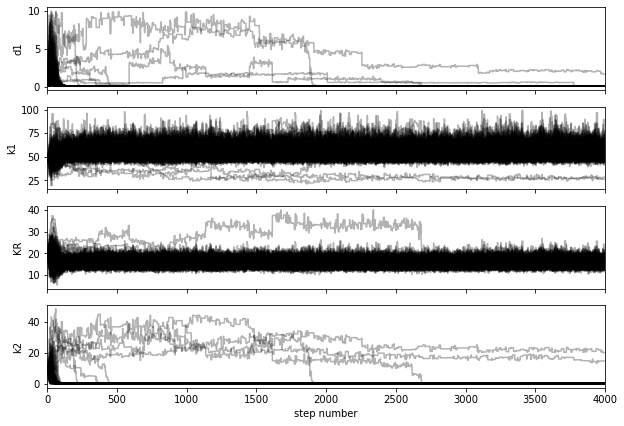

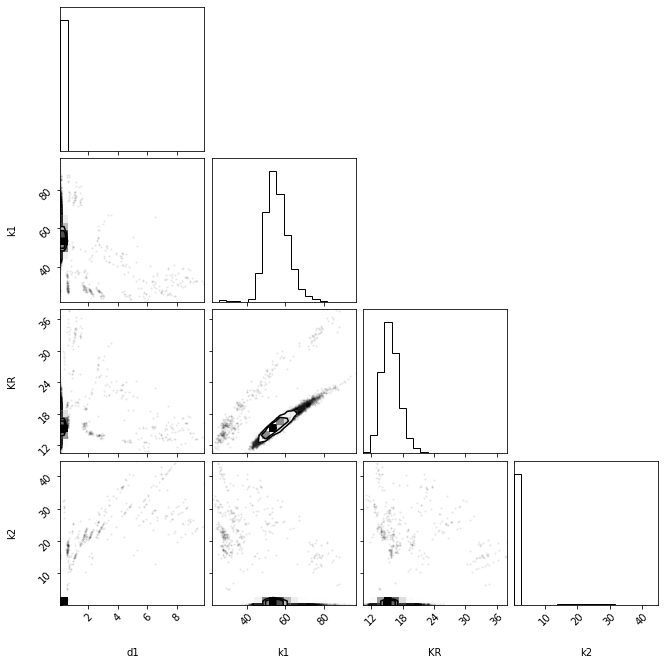

In [6]:
from bioscrape.inference import py_inference
prior = {'d1' : ['uniform', 0.1, 10], 'k1' : ['uniform',0,100], 'KR' : ['uniform',0,100], 'k2':['uniform', 0, 100]}

sampler, pid = py_inference(Model = M, exp_data = exp_data, measurements = ['X','Y'], time_column = ['timepoints'],
                            initial_conditions = initial_condition_list,
                            nwalkers = 200, init_seed = 0.15, nsteps = 4000, sim_type = 'deterministic',
                            params_to_estimate = ['d1','k1','KR', 'k2'], prior = prior, convergence_check = True)


Parameter posterior distribution convergence plots:


([0.10503765296323866,
  54.90278180938289,
  15.579821672782845,
  0.4356778754672414],
 [array([0.00380257, 0.00877424]),
  array([5.17969579, 6.46663507]),
  array([1.53774495, 1.81060233]),
  array([0.01898819, 0.01992762])])

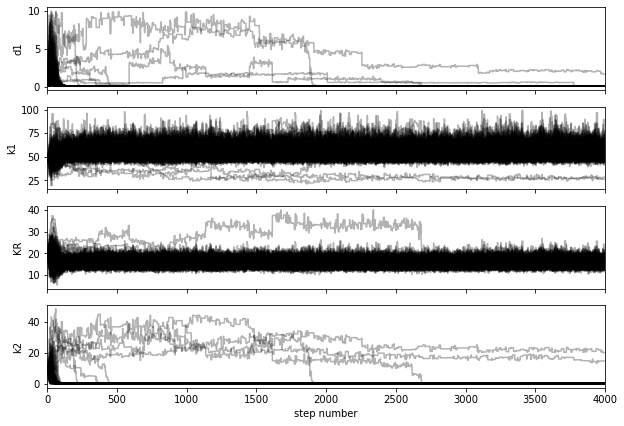

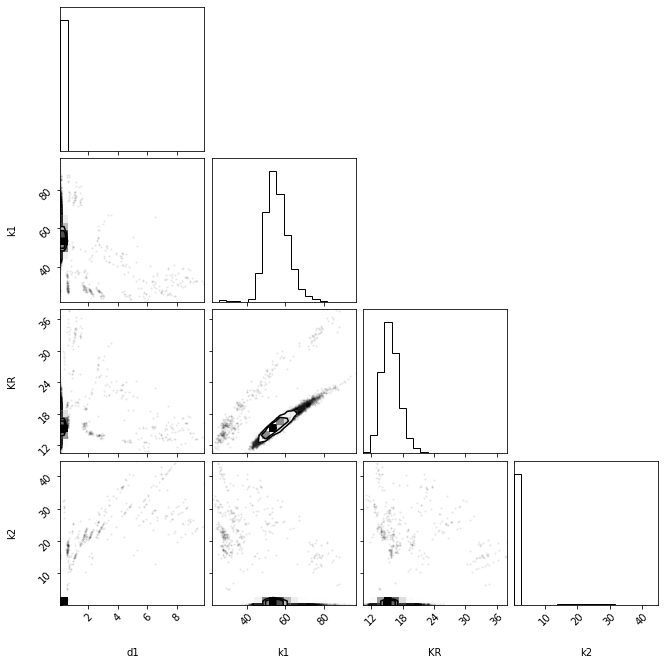

In [8]:
pid.plot_mcmc_results(sampler, convergence_check = True)